# Decay for a tracer metabolites #

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
import scipy as sp
from scipy.integrate import ode
from scipy.integrate import quad
from scipy import stats
from LinearChain import *

## Parameters ##

In [6]:
N_max = 100
conc_ref = 1
a = 2
b = 1
param20 = np.array([a,b]*(20+1))
param50 = np.array([a,b]*(50+1))
param100 = np.array([a,b]*(100+1))

## Run dynamics for the 3 sizes of networks ##

In [9]:
x20 = np.zeros(20+2)
x20[9] = 1
x20[10] = 1

x20 = x20/np.linalg.norm(x20,1)
x50 = np.zeros(50+2)
x50[24] = 1
x50[25] = 1
x50 = x50/np.linalg.norm(x50,1)

x100 = np.zeros(100+2)
x100[49] = 1
x100[50] = 1
x100 = x100/np.linalg.norm(x100,1)

norm20 = [1]
norm50 = [1]
norm100 = [1]

jacob_20 = compute_jacobian(20,param20)
jacob_50 = compute_jacobian(50,param50)
jacob_100 = compute_jacobian(100,param100)

tau = 1/(a+b - 2*np.sqrt(a*b)*np.cos(np.pi/(100+1)))
dt = tau/100
tt = [0]

mat20 = sp.linalg.expm(jacob_20*dt)
mat50 = sp.linalg.expm(jacob_50*dt)
mat100 = sp.linalg.expm(jacob_100*dt)

while norm100[-1]>1E-6:
    tt.append(tt[-1]+dt)
    x20 = np.dot(mat20,x20)
    norm20.append(np.linalg.norm(x20,1))
    x50 = np.dot(mat50,x50)
    norm50.append(np.linalg.norm(x50,1))
    x100 = np.dot(mat100,x100)
    norm100.append(np.linalg.norm(x100,1))

## Plot figure ##

<IPython.core.display.Javascript object>


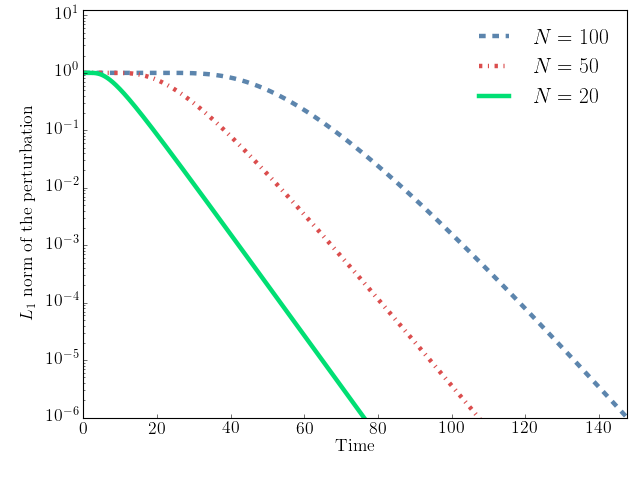

In [21]:
exec(open("fig_settings.py").read())
fig = plt.figure()
fig.clf()
ax = fig.add_axes([0.13, 0.13, 0.85, 0.85])
ax.yaxis.tick_left()
ax.xaxis.tick_bottom()
ax.yaxis.labelpad = 6
ax.xaxis.labelpad = 2
lw = 4
ax.plot(tt,norm100,label=r"$N=100$",ls="--",linewidth=lw,color=myblue)
rc("legend",handlelength = 2)
ax.plot(tt,norm50,label=r"$N=50$",ls="-.",linewidth=lw,color=myred)
#rc("legend",numpoints = 1)
ax.plot(tt,norm20,label=r"$N=20$",ls="-",linewidth=lw,color=mygreen)
ax.set_xlim([0,tt[-1]])

ylim_up = 10**1.1
ylim_down = 1e-6
ax.set_ylim([ylim_down,ylim_up])
#ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r"Time")
ax.set_ylabel(r"$L_1$ norm of the perturbation",rotation=90)
ax.legend(loc=1,frameon=0,framealpha=0)
fig.show()
fig.savefig("figures/decay_tracer.pdf")
